In [1]:
import PyPDF2
import nltk
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.text import Text
from nltk import FreqDist
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from gensim.models import Word2Vec

In [2]:
#Loading test dataset as 'abstracts' from .pdf files (NOTE: FILE PATHS MAY NEED TO BE CHANGED ACCORDINGLY)
fileNames = ['C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Sharma et al, 2020, ML in SSCM agricultural.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Szekely and vom Brocke-LDA sustainability parctices.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Tavana et al, 2021, Digi SCM and text mining.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Roehrich et al, 2014, SSCM decision risk and bounded rationality.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Santoso_2021_ML in sustainable agri-food SC.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Reefke et al, 2014, maturity model for SSCM.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Paul et al, SSCM and Multi-criteria DM methods.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Stindt, sscm decison making.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Thimm, use of decision trees to inform sustainable decision-making.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Abdelrahman et al, Energy Efficiency NLP.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Benabdellah, An ontology‐based knowledge management model for green.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Li 2022 scm investment risk BPNN.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Pimentel et al, sustainable mining.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Tirkolaee et al, 2021, ML in SCM.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/LopesDeSousaJabbour Industry40AndTheCircularEconom.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Machado et al, Sustainable OM framework.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Peters AScalablePreferenceModelForAut.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Riaz et al, Sustainable Energy Planning.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Wellar and Garrison SUSTAINABLE TRANSPORT DECISIONS.pdf',
            'C:/Users/Gayle/Dropbox/DSA/Dissertation/Appendix/Abstracts dataset/Wu and Pagell Balancing priorities  Decision‐making in sustainable supply chain management.pdf'
            ]
abstracts=[]


# code adapted from https://www.geeksforgeeks.org/working-with-pdf-files-in-python/
for file in fileNames:
    # creating a pdf file object
    pdfFileObj = open(file, 'rb')

    # creating a pdf reader object
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

    # creating a page object
    pageObj = pdfReader.getPage(0)

    # extracting text from page and appending in the Abstracts dataset list
    abstracts.append([(pageObj.extractText())])
    #print(data)

    # closing the pdf file object
    pdfFileObj.close()

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


In [3]:
#Verifying data has been loaded correctly
print("Count of data: " + str(len(abstracts)) + " of type " + str(type(abstracts)))
print(abstracts)

Count of data: 20 of type <class 'list'>
[['Computers  and Operations  Research  119 (2020)  104926  \nContents  lists available  at ScienceDirect  \nComputers  and  Operations  Research  \njournal  homepage:  www.elsevier.com/locate/cor  \nTechnical  Note  \nA systematic  literature  review  on machine  learning  applications  for  \nsustainable  agriculture  supply  chain  performance  \nRohit  Sharma  a , 1 , Sachin  S. Kamble  b , 2 , Angappa  Gunasekaran  c , 3 , Vikas  Kumar  d , 4 , ∗, \nAnil  Kumar  e , 5 \na Operations  and SCM, National  Institute  of Industrial  Engineering  (NITIE),  Mumbai-40  0 087, India \nb Operations  and Supply  Chain Management,  National  Institute  of Industrial  Engineering  (NITIE),  Mumbai-40  0 087, India \nc School  of Business  and Public  Administration,  California  State University,  Bakersﬁeld,  9001 Stockdale  Highway,  20BDC/140,  Bakersﬁeld,  CA 93311-1022,  \nUnited  States \nd Operations  and Supply  Chain Management,  Bristol  Busin

In [4]:
#Data Preprocessing: Removing new lines and tabs, links and emails 

cleanAbstracts= []
i=0

while i < len(abstracts):
    for text in abstracts[i]:
        cleanText= text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
        cleanText = re.sub(r'http\S+', '', cleanText)
        cleanText = re.sub(r'www.\S+', '', cleanText)
        cleanText = re.sub(r'doi.\S+', '', cleanText)
        cleanText = re.sub(r"\ [A-Za-z]*\.com", " ", cleanText)
        cleanText = re.sub(r"\ [A-Za-z]*\.org", " ", cleanText)
        cleanText = re.sub(r"\S*@\S*\s?", " ", cleanText)
        cleanAbstracts.append([cleanText])
    i+=1

print(cleanAbstracts)

[['Computers  and Operations  Research  119 (2020)  104926   Contents  lists available  at ScienceDirect   Computers  and  Operations  Research   journal  homepage:     Technical  Note   A systematic  literature  review  on machine  learning  applications  for   sustainable  agriculture  supply  chain  performance   Rohit  Sharma  a , 1 , Sachin  S. Kamble  b , 2 , Angappa  Gunasekaran  c , 3 , Vikas  Kumar  d , 4 , ∗,  Anil  Kumar  e , 5  a Operations  and SCM, National  Institute  of Industrial  Engineering  (NITIE),  Mumbai-40  0 087, India  b Operations  and Supply  Chain Management,  National  Institute  of Industrial  Engineering  (NITIE),  Mumbai-40  0 087, India  c School  of Business  and Public  Administration,  California  State University,  Bakersﬁeld,  9001 Stockdale  Highway,  20BDC/140,  Bakersﬁeld,  CA 93311-1022,   United  States  d Operations  and Supply  Chain Management,  Bristol  Business  School,  University  of the West of England,  United  Kingdom  (UK)  e Decis

In [5]:
#Data Preprocessing: Text normalization, White Space Removal and Tokenization

tokenizer = nltk.tokenize.WordPunctTokenizer()
i=0
tokens = []

while i < len(cleanAbstracts):
    for a in cleanAbstracts[i]:
        a= a.lower()
        a= a.replace("sustainable supply chain management","SSCM")
        a= a.replace("supply chain management","SCM")
        a= a.replace("supply chain","SC")
        tokens.append(tokenizer.tokenize(a.strip()))
        i+=1
    
#checking tokenization
print(tokens)

[['computers', 'and', 'operations', 'research', '119', '(', '2020', ')', '104926', 'contents', 'lists', 'available', 'at', 'sciencedirect', 'computers', 'and', 'operations', 'research', 'journal', 'homepage', ':', 'technical', 'note', 'a', 'systematic', 'literature', 'review', 'on', 'machine', 'learning', 'applications', 'for', 'sustainable', 'agriculture', 'supply', 'chain', 'performance', 'rohit', 'sharma', 'a', ',', '1', ',', 'sachin', 's', '.', 'kamble', 'b', ',', '2', ',', 'angappa', 'gunasekaran', 'c', ',', '3', ',', 'vikas', 'kumar', 'd', ',', '4', ',', '∗,', 'anil', 'kumar', 'e', ',', '5', 'a', 'operations', 'and', 'scm', ',', 'national', 'institute', 'of', 'industrial', 'engineering', '(', 'nitie', '),', 'mumbai', '-', '40', '0', '087', ',', 'india', 'b', 'operations', 'and', 'supply', 'chain', 'management', ',', 'national', 'institute', 'of', 'industrial', 'engineering', '(', 'nitie', '),', 'mumbai', '-', '40', '0', '087', ',', 'india', 'c', 'school', 'of', 'business', 'and',

In [6]:
#Data Preprocessing: Numbers, Punctuation Removal and Stop Words Removal

punctuation = list(string.punctuation)

stopWords = nltk.corpus.stopwords.words('english')
additional = ["gid", "q", "iop", "ce", "et", "al"]
for i in additional:
    stopWords.append(i)

cleanTokens = []
i=0
tokenSum=0

while i < len(tokens):
    ct = []
    for t in tokens[i]:
        t= t.replace("’","")
        t= t.replace("”","")
        t= t.replace("“","")
        t= t.replace("©","")
        t= t.replace("–","")
        t= t.replace("·","")
        t= t.translate(str.maketrans('','',string.punctuation))
        t= ''.join([i for i in t if not i.isdigit()])
        if t.lower() not in stopWords and t not in punctuation and t != '' and not t.isdigit() and len(t)!=1:
            ct.append(t) 
            tokenSum = tokenSum + len(ct)
    cleanTokens.append(ct) 
    i+=1
        
#checking removal
print(cleanTokens)

[['computers', 'operations', 'research', 'contents', 'lists', 'available', 'sciencedirect', 'computers', 'operations', 'research', 'journal', 'homepage', 'technical', 'note', 'systematic', 'literature', 'review', 'machine', 'learning', 'applications', 'sustainable', 'agriculture', 'supply', 'chain', 'performance', 'rohit', 'sharma', 'sachin', 'kamble', 'angappa', 'gunasekaran', 'vikas', 'kumar', 'anil', 'kumar', 'operations', 'scm', 'national', 'institute', 'industrial', 'engineering', 'nitie', 'mumbai', 'india', 'operations', 'supply', 'chain', 'management', 'national', 'institute', 'industrial', 'engineering', 'nitie', 'mumbai', 'india', 'school', 'business', 'public', 'administration', 'california', 'state', 'university', 'bakersﬁeld', 'stockdale', 'highway', 'bdc', 'bakersﬁeld', 'ca', 'united', 'states', 'operations', 'supply', 'chain', 'management', 'bristol', 'business', 'school', 'university', 'west', 'england', 'united', 'kingdom', 'uk', 'decision', 'sciences', 'centre', 'suppl

In [7]:
#Data Preprocessing: Lemmatizing using WordNetLemmatizer
stemmer = nltk.stem.WordNetLemmatizer()
lemmAbstracts = []
i=0

while i < len(cleanTokens):
    lemmAbstracts.append(" ".join(stemmer.lemmatize(token) for token in cleanTokens[i]))      
    i+=1

print(lemmAbstracts)

['computer operation research content list available sciencedirect computer operation research journal homepage technical note systematic literature review machine learning application sustainable agriculture supply chain performance rohit sharma sachin kamble angappa gunasekaran vikas kumar anil kumar operation scm national institute industrial engineering nitie mumbai india operation supply chain management national institute industrial engineering nitie mumbai india school business public administration california state university bakersﬁeld stockdale highway bdc bakersﬁeld ca united state operation supply chain management bristol business school university west england united kingdom uk decision science centre supply chain improvement university derby united kingdom uk article history received february revised january accepted february available online february keywords agricultural supply chain machine learning sustainability smart farming systematic literature review agriculture 

In [8]:
# EDA to find contextual words for 'sustainable' in each document
print("==Context for the word 'Sustainable=='")
i=0
while i<len(tokens):
    tokenList = nltk.Text(tokens[i])
    print("  In Abstract " + str(i+1) + ":-")
    tokenList.concordance("sustainable")
    i+=1


==Context for the word 'Sustainable=='
  In Abstract 1:-
Displaying 6 of 6 matches:
machine learning applications for sustainable agriculture supply chain performa
 an ml applications framework for sustainable asc is pro - posed . the framewor
lity ( rockström et al ., 2017 ). sustainable agriculture practices not only fo
2015 ; adnan et al ., 2018 ). the sustainable agriculture supply chains ( ascs 
nhance their de - cision to adopt sustainable agriculture practices ( sap ) ( a
onsumers for more transparent and sustainable food chains ( tian , 2016 ; du - 
  In Abstract 2:-
no matches
  In Abstract 3:-
no matches
  In Abstract 4:-
Displaying 1 of 1 matches:
ment socially and environmentally sustainable supplychain management practices 
  In Abstract 5:-
Displaying 1 of 1 matches:
 machine learning application for sustainable agri - food SC performance : a re
  In Abstract 6:-
Displaying 3 of 3 matches:
 challenging . in order to become sustainable , SCs are well advised to improve
 mo

[('supply', 8), ('ascs', 8), ('agriculture', 7), ('agricultural', 7), ('sustainability', 7)]


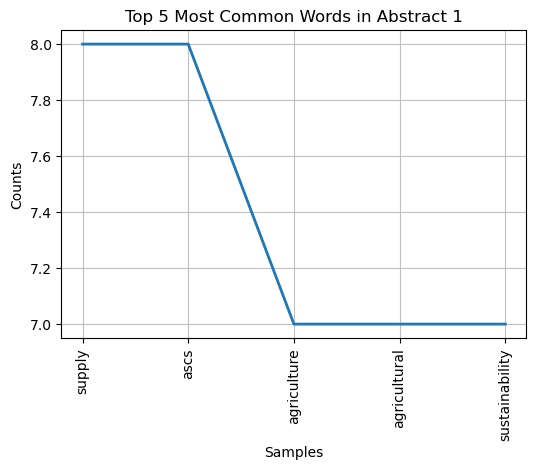

[('sustainability', 7), ('reports', 5), ('published', 5), ('organizations', 5), ('practices', 5)]


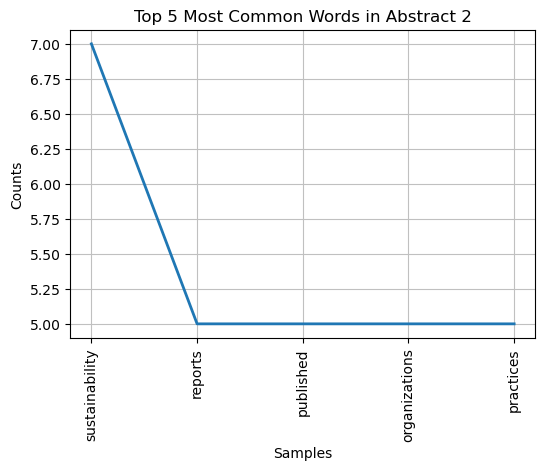

[('digital', 13), ('transformation', 12), ('SC', 8), ('industry', 8), ('technologies', 7)]


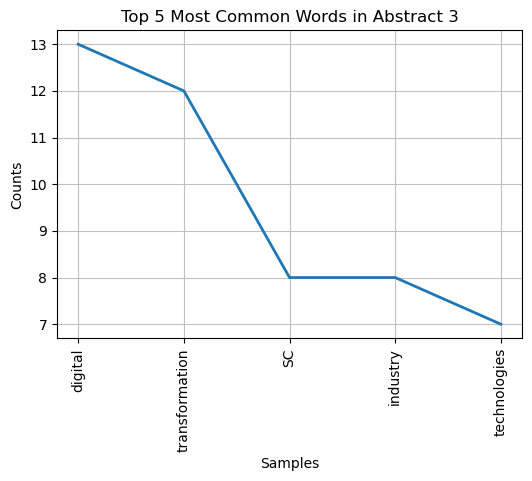

[('sscm', 11), ('decision', 6), ('bounded', 5), ('rationality', 5), ('reputational', 4)]


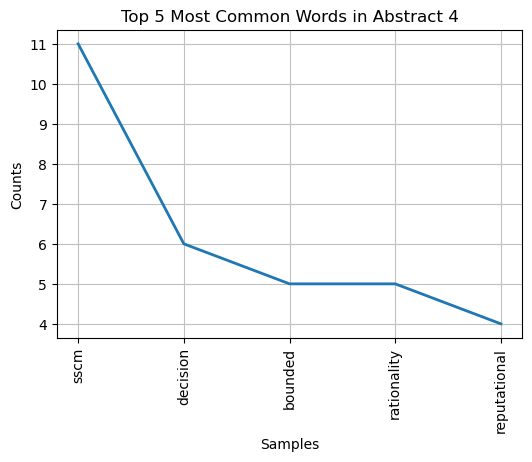

[('food', 4), ('agri', 3), ('SC', 3), ('review', 3), ('earth', 2)]


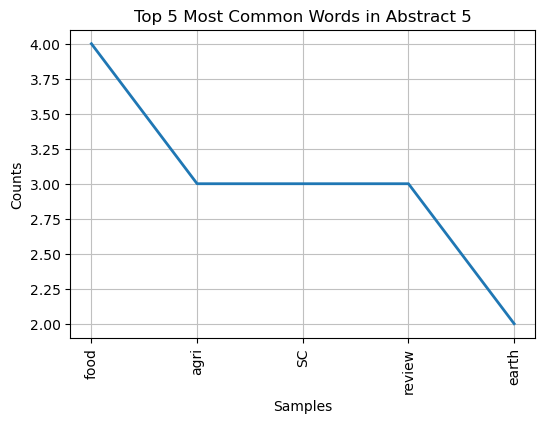

[('sustainability', 6), ('decision', 5), ('making', 5), ('model', 5), ('business', 5)]


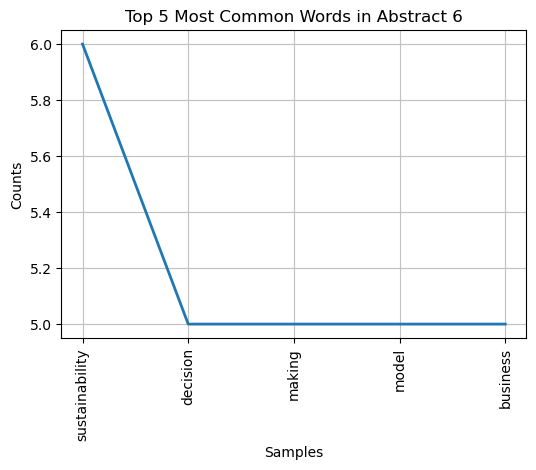

[('methods', 12), ('mcdm', 9), ('sscm', 8), ('literature', 7), ('review', 6)]


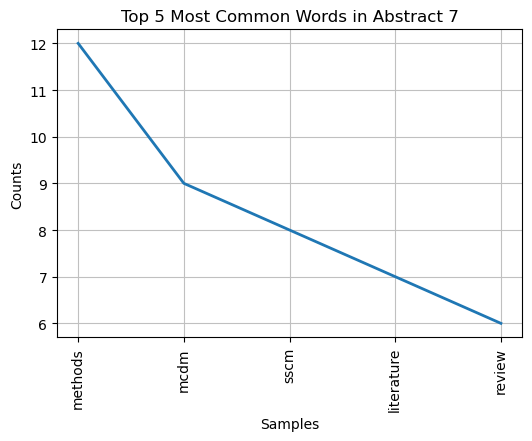

[('sustainability', 9), ('decision', 7), ('planning', 4), ('sustainable', 4), ('methods', 4)]


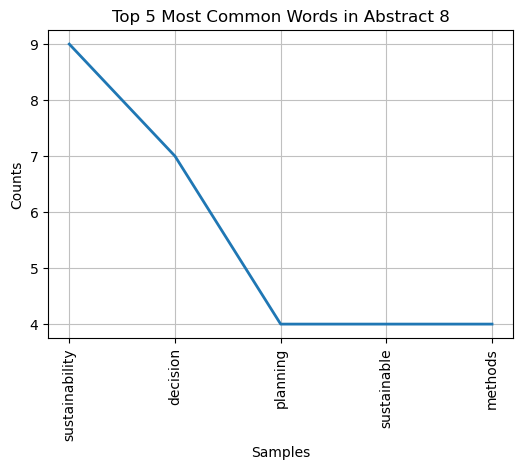

[('environmental', 12), ('corporate', 11), ('decision', 10), ('management', 10), ('digitalization', 10)]


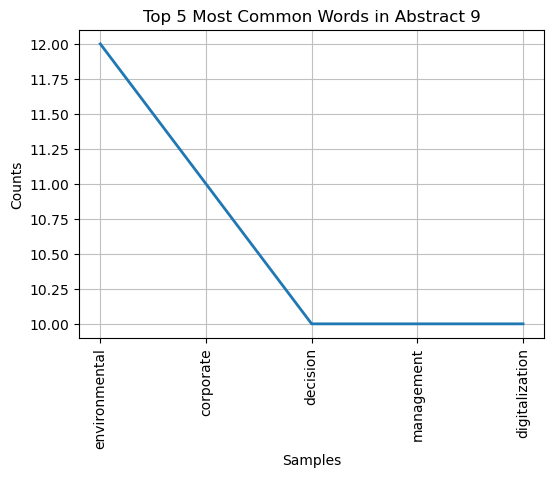

[('data', 16), ('literature', 10), ('science', 8), ('building', 6), ('energy', 6)]


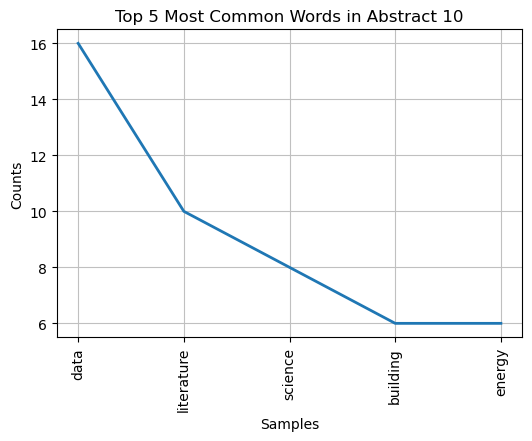

[('design', 14), ('green', 6), ('environment', 5), ('dfx', 5), ('knowledge', 5)]


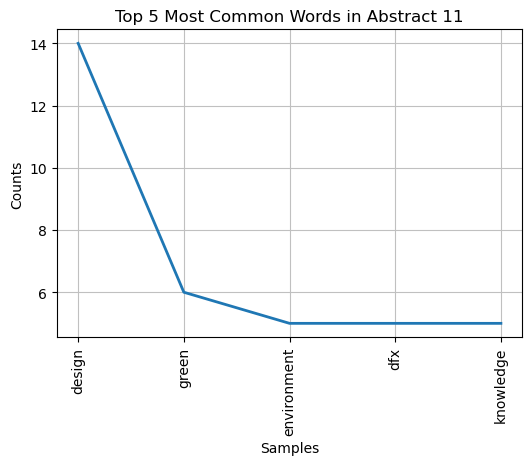

[('risk', 16), ('SC', 13), ('bpnn', 9), ('model', 9), ('risks', 7)]


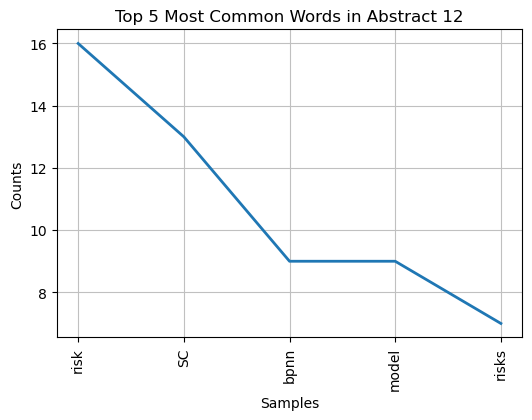

[('mining', 9), ('decision', 4), ('social', 4), ('methods', 4), ('support', 3)]


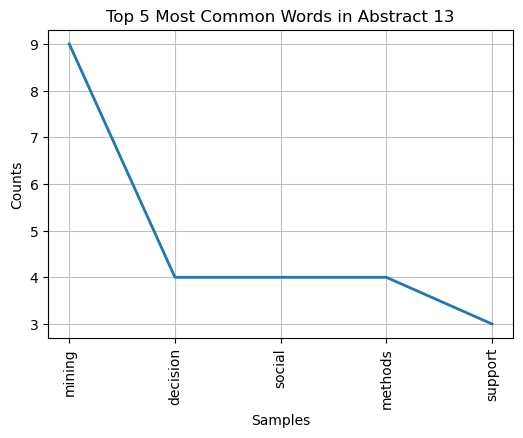

[('data', 10), ('big', 6), ('university', 5), ('department', 4), ('management', 4)]


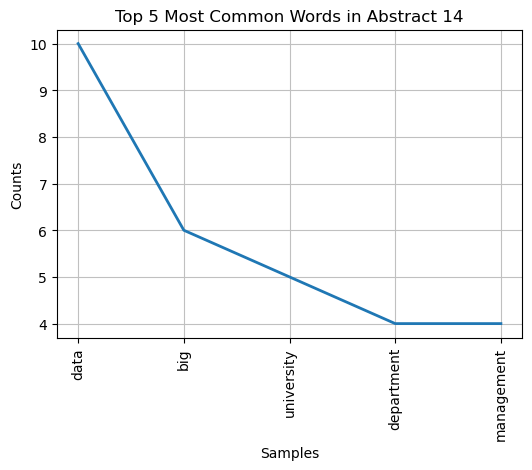

[('industry', 7), ('operations', 4), ('jabbour', 4), ('technologies', 4), ('circular', 3)]


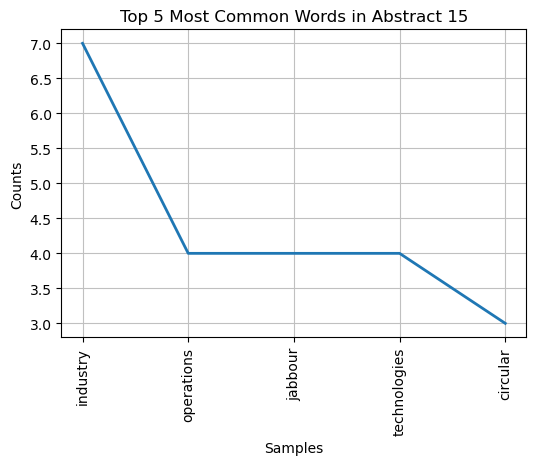

[('operations', 11), ('sustainable', 9), ('management', 8), ('maturity', 7), ('based', 7)]


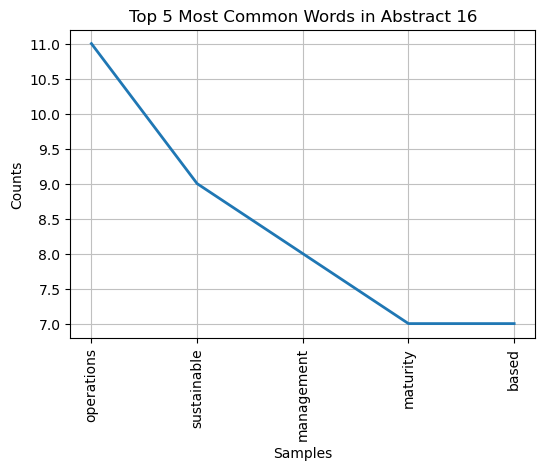

[('model', 5), ('scalable', 4), ('university', 4), ('preference', 3), ('decision', 2)]


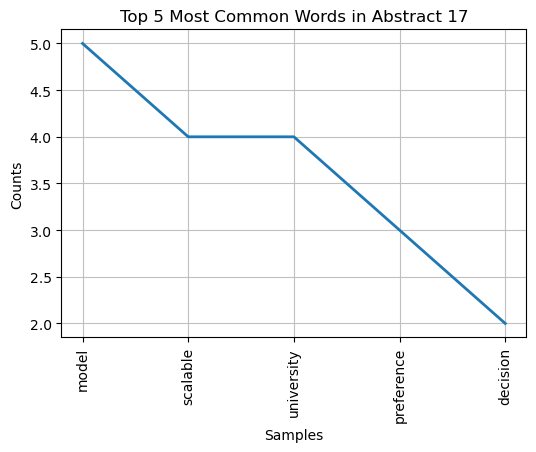

[('fuzzy', 10), ('einstein', 9), ('rung', 8), ('orthopair', 8), ('energy', 7)]


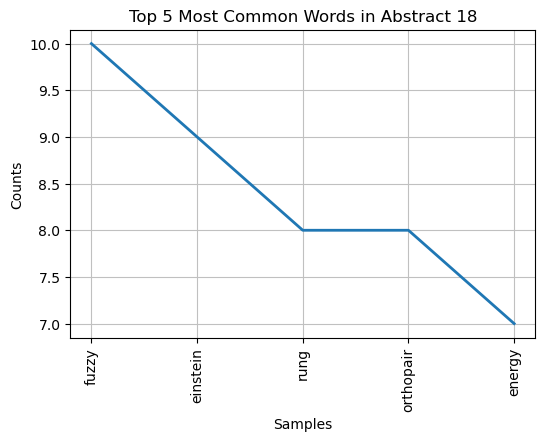

[('research', 2), ('california', 2), ('uc', 1), ('berkeley', 1), ('reports', 1)]


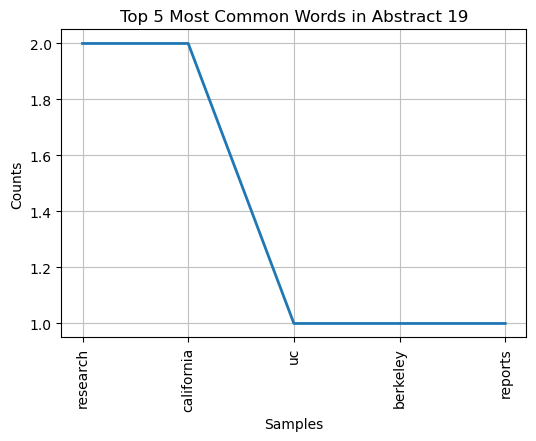

[('environmental', 12), ('organizations', 9), ('business', 8), ('term', 7), ('making', 5)]


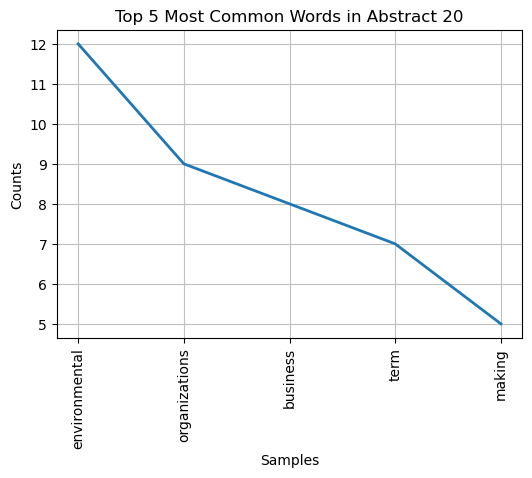

In [9]:
#EDA to find most common words in each document
i=0;
while i<len(cleanTokens):
    title = 'Top 5 Most Common Words in Abstract ' + str(i+1)
    fig = plt.figure(figsize = (6,4))
    frequency_distribution = FreqDist(cleanTokens[i])
    frequency_distribution.most_common(5)
    print(frequency_distribution.most_common(5))
    frequency_distribution.plot(5, cumulative=False, title=title)
    plt.show()
    fig.savefig('' +title+ '.png', bbox_inches='tight')
    i +=1

In [10]:
# EDA to find collocation word pairs
stemmer = nltk.stem.WordNetLemmatizer()
i=0

print("==Important Word Pairs==")

while i < len(cleanTokens):
    tokenList = nltk.Text(stemmer.lemmatize(token) for token in cleanTokens[i])
    print("  In Abstract " + str(i+1) + ":-")
    tokenList.collocations()
    i+=1


==Important Word Pairs==
  In Abstract 1:-
supply chain; machine learning; sustainable agriculture; food
security; elsevier ltd; engineering nitie; industrial engineering;
institute industrial; key ensure; ltd right; mumbai india; national
institute; nitie mumbai; right reserved; data analytics; literature
review; systematic literature; united kingdom; computer operation;
agriculture practice
  In Abstract 2:-
vom brocke; topic modelling; open access; modelling technique; plo
one; reporting deriving; szeâkely vom; research practice; learn
corporate; sustainability practice; published using; using topic;
corporate sustainability; report published; practice corporate
  In Abstract 3:-
digital transformation; text mining; using text; process management;
kumar gangadhari; big data; important topic; industrial engineering;
management using; SCM industry; data analytics; transformation SCM;
industry technology; technology industry; review digital
  In Abstract 4:-
bounded rationality; reputa

In [11]:
#TF-IDF Modeling

tfidfVec = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.5, ngram_range=(1,5), 
                           vocabulary = pickle.load(open("tfidf.pkl", "rb")))
tfidfModel = tfidfVec.fit_transform(lemmAbstracts)
tfidfKeywords = tfidfVec.get_feature_names()

# adding the tfidf score of each keyword through documents to determine the ranking
rank = tfidfModel.sum(axis=0)

# connecting keyword to its summed tfidf score
data = []
for col, tfidfKeywords in enumerate(tfidfKeywords):
    data.append((tfidfKeywords, rank[0,col]))

#saving ranking and then printing the sorted list of top 10 keywords
ranking = pd.DataFrame(data, columns=['Keyword','Rank'])
print(ranking.sort_values('Rank', ascending=False).head(10))


        Keyword      Rank
766    decision  2.257490
419    business  1.691144
2426       risk  1.660855
732        data  1.620288
1807      model  1.576101
1967  operation  1.456517
2380   research  1.403219
2411     review  1.290205
169     article  1.253306
1368   industry  1.227328


C:\Users\Gayle\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
#Word2Vector modeling
w2vModel = Word2Vec.load("word2vec.model")
w2vModel.build_vocab(cleanTokens, update=True)

#using 5 epochs
w2vModel.train(cleanTokens, total_examples=25000, epochs=5)
print("Model trained with 5 epochs to output words similar to Management")

#evaluating model effectiveness at predicting words similar to 'management'
w2vModel.wv.most_similar("management")

Model trained with 5 epochs to output words similar to Management


[('decision', 0.9998095631599426),
 ('use', 0.9998030066490173),
 ('process', 0.9997915625572205),
 ('operations', 0.9997837543487549),
 ('new', 0.9997828006744385),
 ('based', 0.9997744560241699),
 ('data', 0.9997720718383789),
 ('home', 0.9997672438621521),
 ('received', 0.9997659921646118),
 ('risk', 0.9997609257698059)]

In [15]:
#using 25 epochs
w2vModel.train(cleanTokens, total_examples=25000, epochs=25)
print("Model trained with 25 epochs to output words similar to Management")

#evaluating model effectiveness at predicting words similar to 'management'
w2vModel.wv.most_similar("management")

Model trained with 25 epochs to output words similar to Management


[('systems', 0.9998308420181274),
 ('operations', 0.9998124241828918),
 ('national', 0.9997993111610413),
 ('technology', 0.9997960329055786),
 ('new', 0.9997918605804443),
 ('kumar', 0.9997753500938416),
 ('development', 0.9997715950012207),
 ('intelligence', 0.9997705817222595),
 ('called', 0.999769389629364),
 ('chain', 0.9997659921646118)]

In [16]:
w2vModel.wv.most_similar("sustainability")

[('one', 0.9996860027313232),
 ('competitive', 0.9996296167373657),
 ('however', 0.9995939135551453),
 ('way', 0.9995906949043274),
 ('number', 0.999550998210907),
 ('practices', 0.9995350241661072),
 ('integration', 0.9995341897010803),
 ('many', 0.9995246529579163),
 ('able', 0.9995224475860596),
 ('analysis', 0.9995183348655701)]

In [17]:
w2vModel.wv.most_similar("SSCM")

[('management', 0.9998595118522644),
 ('mining', 0.9998540282249451),
 ('business', 0.9998526573181152),
 ('paper', 0.9998503923416138),
 ('sustainable', 0.9998502135276794),
 ('learning', 0.9998500943183899),
 ('making', 0.9998457431793213),
 ('information', 0.999840259552002),
 ('industry', 0.9998396635055542),
 ('operations', 0.9998382329940796)]

In [18]:
# Using Top 10 TF-IDF Keywords with the Word2Vec Model to eliminate dissimilar keywords
sorted_tfidf_keywords = ranking.sort_values('Rank', ascending=False)
tfidf_keywords_list = sorted_tfidf_keywords['Keyword'].values.tolist()
filterKW = w2vModel.wv.doesnt_match(tfidf_keywords_list[:10])
print("Keyword(s) to be eliminated: " +filterKW)

Keyword(s) to be eliminated: article


In [19]:
# Using Top 10 TF-IDF Keywords with the Word2Vec Model to provide similar keywords but eliminating the dissimilar word
for key in tfidf_keywords_list[:10]:
    if key not in filterKW:
        print(key, w2vModel.wv.most_similar(key, topn=3))

decision [('sustainable', 0.9998021125793457), ('making', 0.9997968673706055), ('vehicle', 0.9997735023498535)]
business [('state', 0.9997637867927551), ('administration', 0.9997178912162781), ('management', 0.9996898174285889)]
risk [('high', 0.999748170375824), ('process', 0.9997408986091614), ('investment', 0.9997128248214722)]
data [('operation', 0.9996123909950256), ('text', 0.999598503112793), ('digital', 0.9995689988136292)]
model [('development', 0.9998144507408142), ('military', 0.9997944831848145), ('process', 0.9997926950454712)]
operation [('mining', 0.9996588230133057), ('text', 0.9996480345726013), ('intelligence', 0.999636173248291)]
research [('described', 0.9997285604476929), ('important', 0.9997130632400513), ('men', 0.9997113347053528)]
review [('using', 0.9998336434364319), ('systematic', 0.9998204112052917), ('home', 0.9998201131820679)]
industry [('economy', 0.9997940063476562), ('text', 0.9997652173042297), ('mining', 0.9997638463973999)]
